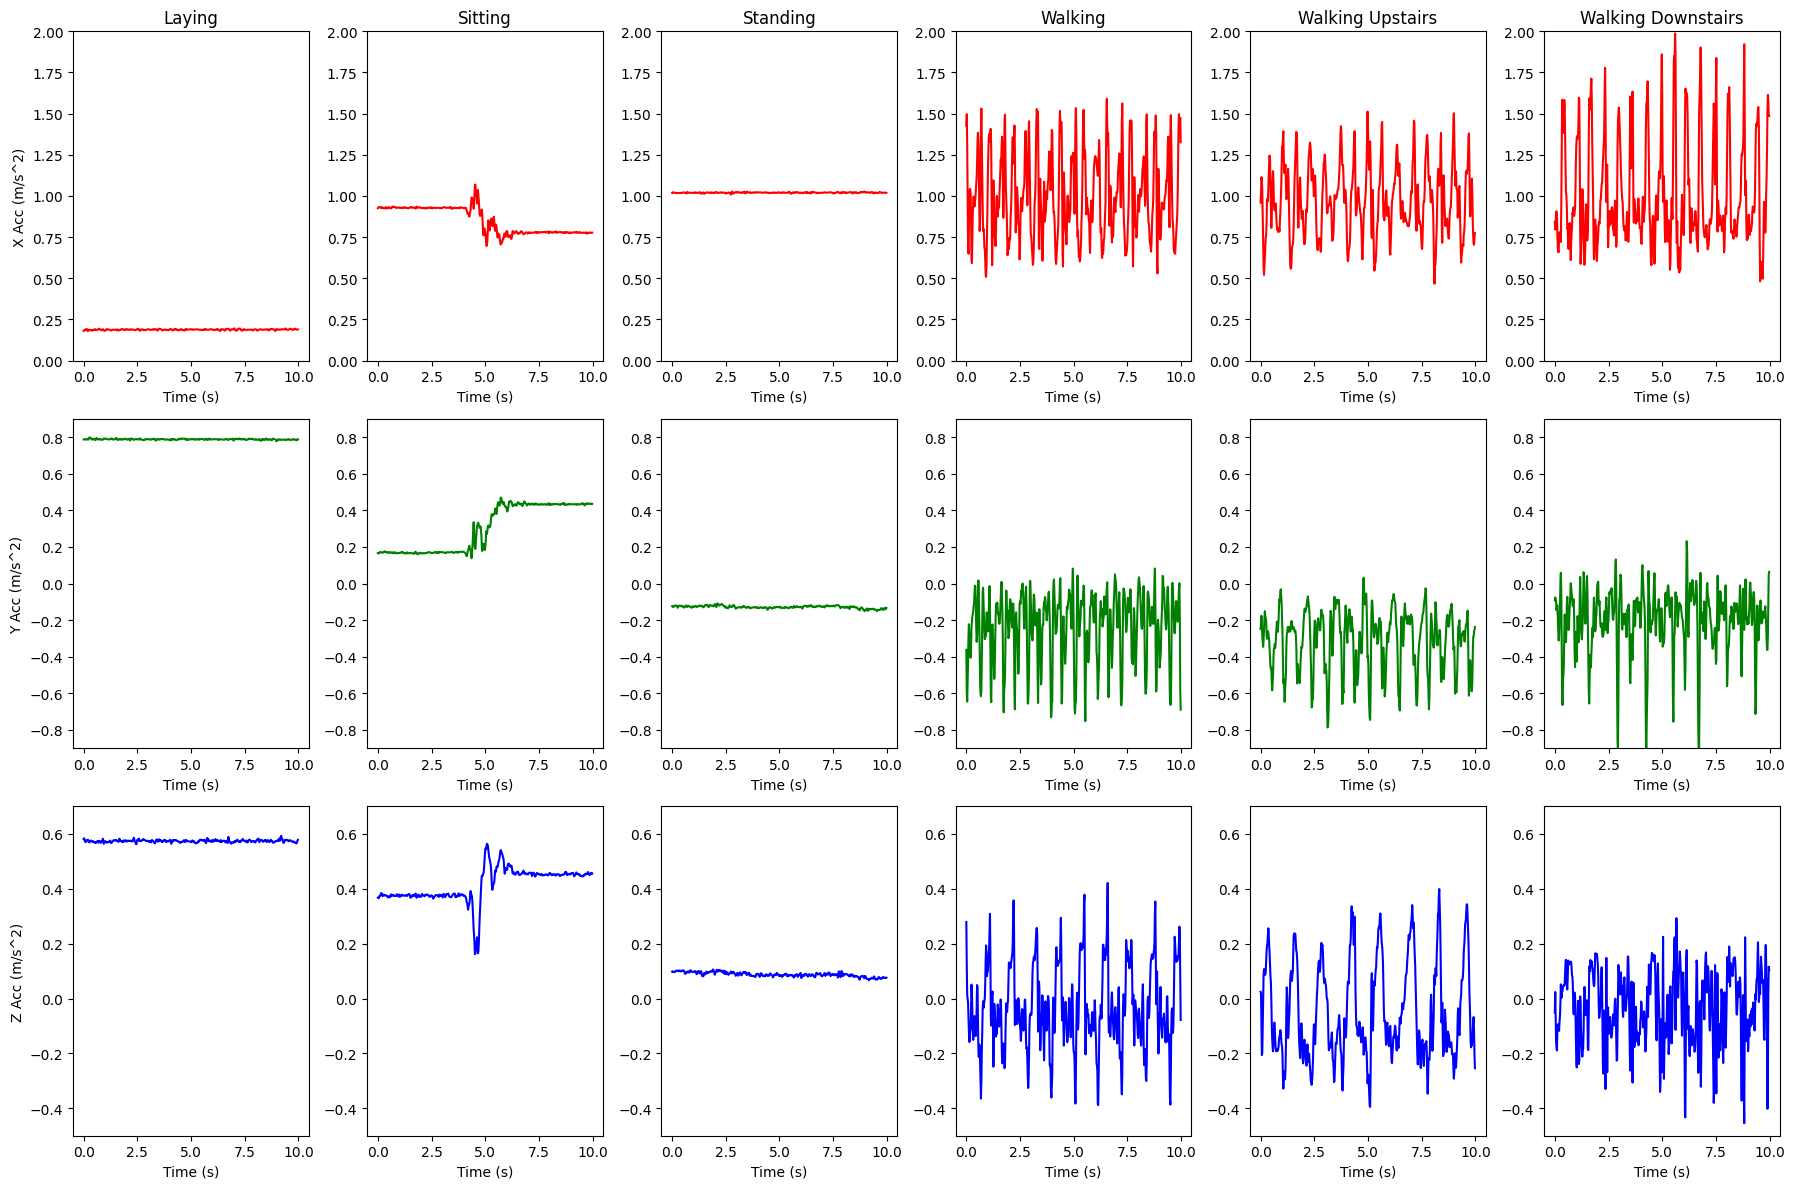

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 12))

for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)
    
    x_acc = data['accx'][:500]
    y_acc = data['accy'][:500]
    z_acc = data['accz'][:500]
    
    time = [i/50 for i in range(500)]
    
    plt.subplot(3, 6, i + 1)
    plt.plot(time, x_acc, color='r')
    plt.ylim(0,2)
    plt.title(activities[i])
    if i == 0:
        plt.ylabel('X Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    plt.subplot(3, 6, i + 7)
    plt.plot(time, y_acc, color='g')
    plt.ylim(-0.9,0.9)
    if i == 0:
        plt.ylabel('Y Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    plt.subplot(3, 6, i + 13)
    plt.plot(time, z_acc, color='b')
    plt.ylim(-0.5,0.7)
    if i == 0:
        plt.ylabel('Z Acc (m/s^2)')
    plt.xlabel('Time (s)')

plt.tight_layout()

plt.show()


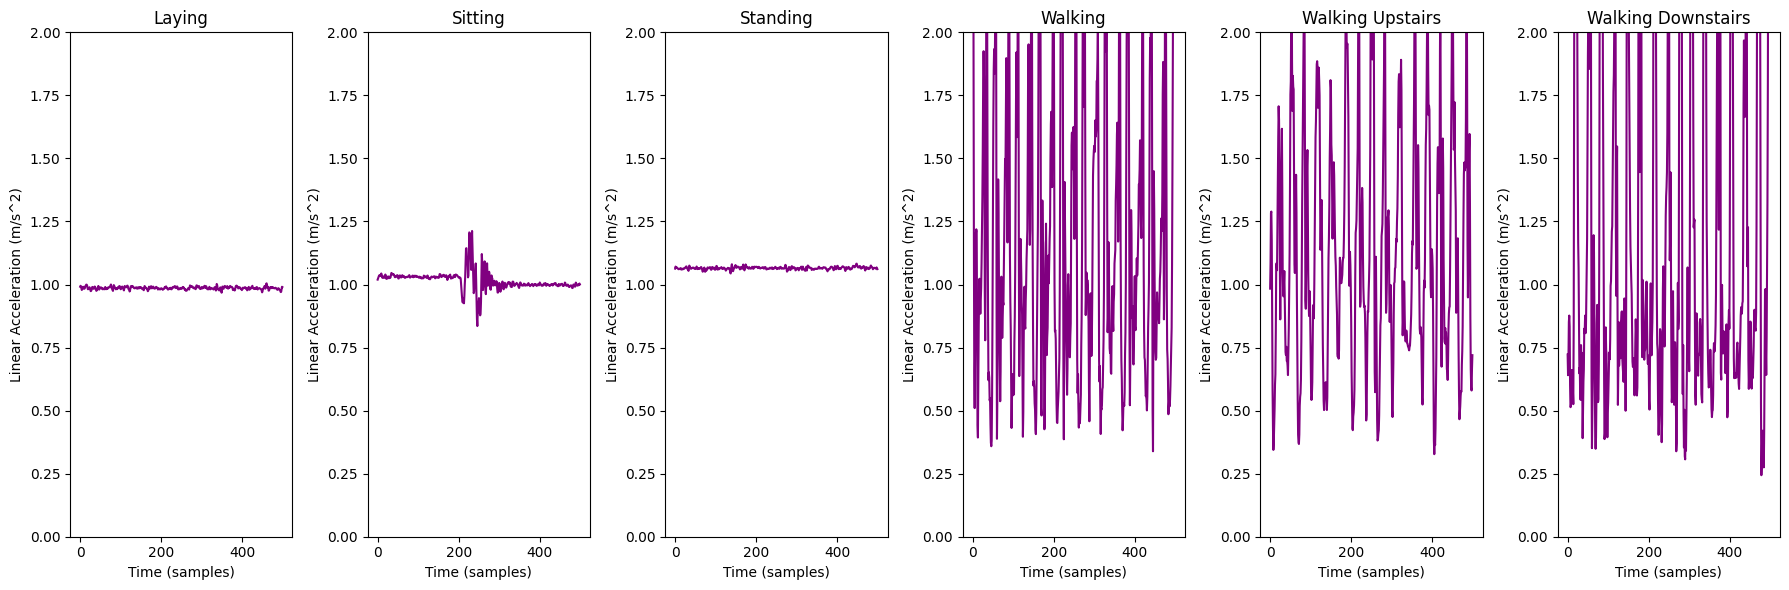

In [14]:
import numpy as np


files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 6))


for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)

    linear_acc = data['accx']**2 + data['accy']**2 + data['accz']**2

    plt.subplot(1, 6, i + 1)
    plt.plot(linear_acc[:500], color='purple')
    plt.title(activities[i])
    plt.ylim(0, 2)
    plt.xlabel('Time (samples)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    
plt.tight_layout()
plt.show()

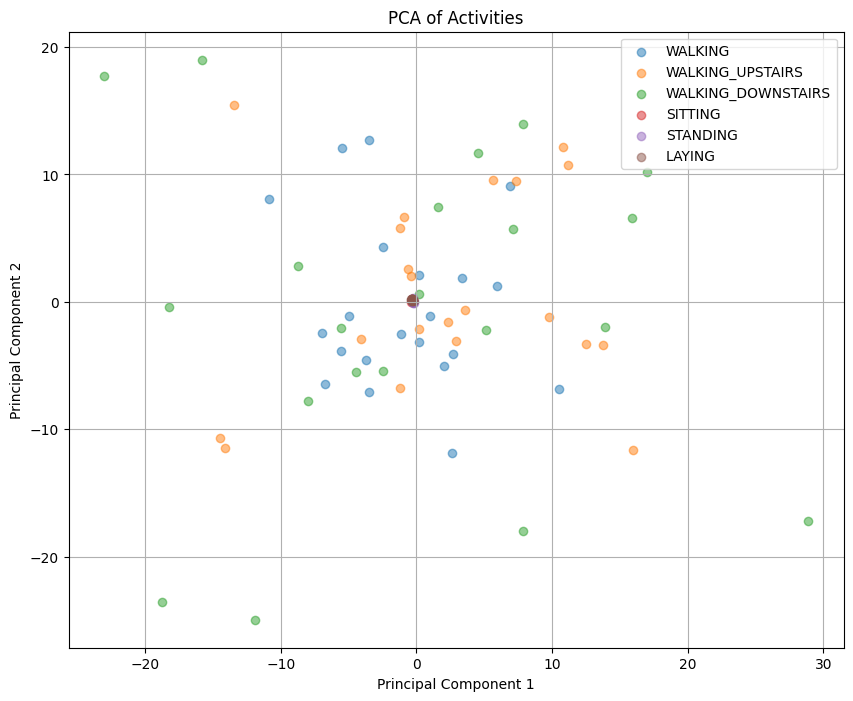

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train, y_train, classes

total_acceleration = np.sum(X_train**2, axis=2)

X_train_2D = total_acceleration.reshape(total_acceleration.shape[0], -1)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_2D)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scale)

labels = {v: k for k, v in classes.items()}

plt.figure(figsize=(10, 8))

activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from MakeDataset import X_train, y_train, classes

# Step 1: Reshape the data into the shape required by TSFEL (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape

# Reshape data into 2D array for TSFEL (combine features and timesteps)
X_train_reshaped = X_train.reshape(n_samples, n_timesteps * n_features)

# Step 2: Create a custom feature configuration to select only relevant features
cfg = tsfel.get_features_by_domain()  # Start with the full feature set

# Customize the feature configuration by enabling only specific features
# Example: Enabling only temporal features (mean, standard deviation, etc.)
for domain in cfg:
    if domain != 'temporal':  # Only keep temporal features
        cfg[domain] = {}

# Step 3: Extract the selected features using TSFEL
X_train_tsfel = pd.DataFrame()

for i in range(n_samples):
    tsfel_features = tsfel.time_series_features_extractor(cfg, X_train_reshaped[i, :].reshape(n_timesteps, n_features))
    X_train_tsfel = pd.concat([X_train_tsfel, tsfel_features], axis=0, ignore_index=True)

# Step 4: Standardize the feature data
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)

# Step 5: Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tsfel_scaled)

# Step 6: Plot the scatter plot
labels = {v: k for k, v in classes.items()}
activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

plt.figure(figsize=(10, 8))

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities with Selected TSFEL Features')
plt.legend()
plt.grid(True)
plt.show()

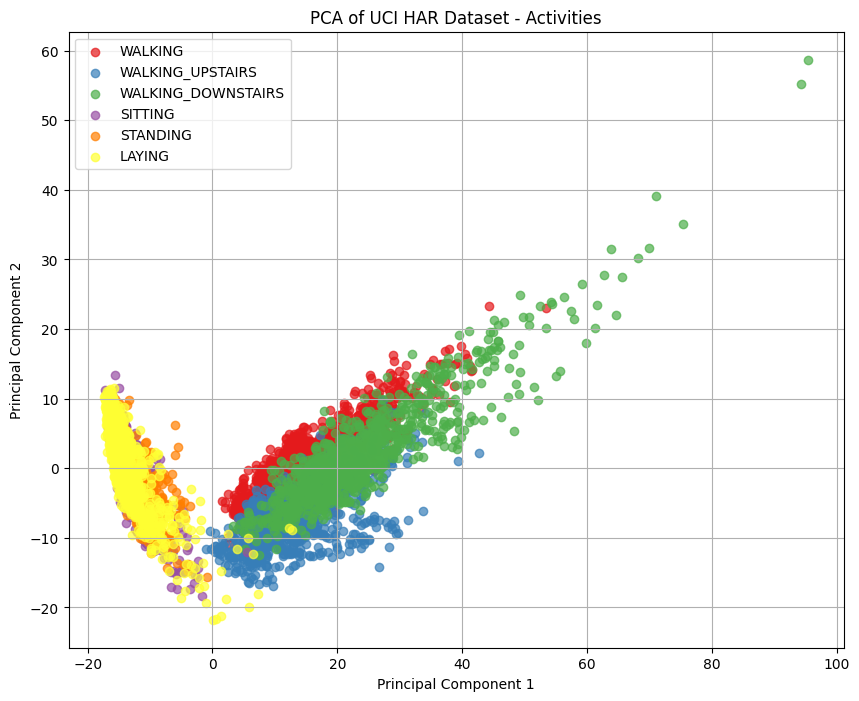

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# File paths
xtrain_path = r'UCI HAR Dataset/train/X_train.txt'
ytrain_path = r'UCI HAR Dataset/train/y_train.txt'

# Load the features and labels
xtrain = np.loadtxt(xtrain_path)
ytrain = np.loadtxt(ytrain_path, dtype=int)

# Preprocessing: Standardize the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# Apply PCA to reduce from 561 features to 2D
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for each activity class with more vibrant and contrasting colors
activities = np.unique(ytrain)
colormap = plt.colormaps.get_cmap('Set1')  # Use a vibrant colormap
colors = [colormap(i) for i in range(len(activities))]

for i, activity in enumerate(activities):
    plt.scatter(xtrain_pca[ytrain == activity, 0], xtrain_pca[ytrain == activity, 1],
                    color=colors[i], label=labels[activity], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of UCI HAR Dataset - Activities')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import pandas as pd

# Assume X_train_tsfel is your raw TSFEL features DataFrame
# Standardize the TSFEL features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)

# Calculate the correlation matrix for TSFEL features
X_train_tsfel_df = pd.DataFrame(X_train_tsfel_scaled)
correlation_matrix_tsfel = X_train_tsfel_df.corr()

# Display the correlation matrix
print("Correlation Matrix of TSFEL Features:")
print(correlation_matrix_tsfel)


Correlation Matrix of TSFEL Features:
          0         1         2         3         4         5         6   \
0   1.000000 -0.225038  0.156292  0.447478 -0.040623  0.442477  0.233990   
1  -0.225038  1.000000 -0.162259 -0.279724 -0.000847 -0.279058 -0.160287   
2   0.156292 -0.162259  1.000000  0.047489  0.036517  0.047191  0.046636   
3   0.447478 -0.279724  0.047489  1.000000 -0.127904  0.995903  0.400054   
4  -0.040623 -0.000847  0.036517 -0.127904  1.000000 -0.120119 -0.011279   
5   0.442477 -0.279058  0.047191  0.995903 -0.120119  1.000000  0.413225   
6   0.233990 -0.160287  0.046636  0.400054 -0.011279  0.413225  1.000000   
7  -0.383327  0.251503  0.009112 -0.809934  0.089736 -0.821350 -0.486222   
8  -0.471253  0.123107 -0.113086 -0.669290  0.071891 -0.657552 -0.429016   
9  -0.379516  0.243470  0.010198 -0.808767  0.085989 -0.820484 -0.483297   
10  0.392090 -0.248079  0.036845  0.962356 -0.156510  0.954855  0.252783   
11  0.025589 -0.314141  0.282143 -0.065037  0.1936

In [47]:
def find_redundant_features(correlation_matrix, threshold=0.95):
    redundant_features = []
    # Iterate through each pair of features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                redundant_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
    return redundant_features

# Identify redundant features in TSFEL with a threshold of 0.95
redundant_features_tsfel = find_redundant_features(correlation_matrix_tsfel, threshold=0.95)

print("Redundant Features in TSFEL Features (Threshold > 0.95):")
for feature_pair in redundant_features_tsfel:
    print(feature_pair)

Redundant Features in TSFEL Features (Threshold > 0.95):
(5, 3)
(9, 7)
(10, 3)
(10, 5)
(12, 3)
(12, 5)
(12, 10)
(17, 3)
(17, 5)
(17, 12)
(19, 3)
(19, 5)
(19, 12)
(19, 17)
(23, 21)
(24, 17)
(26, 3)
(26, 5)
(26, 12)
(26, 17)
(26, 19)
(26, 24)
(33, 31)
(37, 35)
(40, 31)
(40, 33)


In [49]:
import numpy as np
import pandas as pd

# Load the original dataset features
xtrain_path = r'UCI HAR Dataset/train/X_train.txt'
xtrain = np.loadtxt(xtrain_path)

# Convert to DataFrame
xtrain_df = pd.DataFrame(xtrain)

# Calculate the correlation matrix for the original features
correlation_matrix_original = xtrain_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Original Features:")
print(correlation_matrix_original)

Correlation Matrix of Original Features:
          0         1         2         3         4         5         6    \
0    1.000000  0.148061 -0.256952  0.000619 -0.021903 -0.044617  0.006290   
1    0.148061  1.000000 -0.078769 -0.045160 -0.044920 -0.049746 -0.044180   
2   -0.256952 -0.078769  1.000000 -0.020217 -0.016641 -0.008410 -0.018747   
3    0.000619 -0.045160 -0.020217  1.000000  0.927461  0.851668  0.998632   
4   -0.021903 -0.044920 -0.016641  0.927461  1.000000  0.895510  0.922803   
..        ...       ...       ...       ...       ...       ...       ...   
556  0.037444  0.017967 -0.063609  0.018985 -0.008507 -0.018429  0.019389   
557  0.028844  0.075679 -0.034037 -0.024810 -0.014592 -0.006471 -0.024951   
558 -0.035257 -0.005309  0.008587 -0.371653 -0.380531 -0.345011 -0.368191   
559  0.034371  0.001053 -0.015288  0.471065  0.523600  0.476006  0.466424   
560  0.028242 -0.013903 -0.022643  0.394825  0.433169  0.482828  0.390922   

          7         8         9   

In [51]:
# Identify redundant features in original dataset with a threshold of 0.95
redundant_features_xtrain = find_redundant_features(correlation_matrix_original, threshold=0.95)

print("Redundant Features in Original Dataset Features (Threshold > 0.95):")
for feature_pair in redundant_features_xtrain:
    print(feature_pair)

Redundant Features in Original Dataset Features (Threshold > 0.95):
(6, 3)
(7, 4)
(8, 5)
(9, 3)
(9, 6)
(10, 4)
(12, 3)
(12, 6)
(13, 4)
(15, 3)
(15, 4)
(15, 6)
(15, 7)
(15, 9)
(15, 12)
(16, 6)
(19, 3)
(19, 6)
(19, 15)
(20, 4)
(20, 7)
(21, 5)
(21, 8)
(46, 43)
(47, 44)
(48, 45)
(49, 40)
(50, 41)
(51, 42)
(52, 40)
(52, 49)
(53, 41)
(53, 50)
(54, 42)
(54, 51)
(56, 40)
(56, 49)
(56, 52)
(59, 43)
(59, 46)
(60, 44)
(60, 47)
(61, 45)
(61, 48)
(66, 65)
(67, 65)
(67, 66)
(68, 66)
(68, 67)
(70, 69)
(71, 69)
(71, 70)
(72, 70)
(72, 71)
(74, 73)
(75, 73)
(75, 74)
(76, 73)
(76, 74)
(76, 75)
(83, 3)
(83, 6)
(83, 9)
(83, 12)
(83, 15)
(83, 19)
(84, 4)
(84, 13)
(84, 83)
(86, 3)
(86, 6)
(86, 9)
(86, 12)
(86, 15)
(86, 19)
(86, 83)
(86, 84)
(87, 4)
(87, 7)
(87, 83)
(87, 84)
(87, 86)
(88, 85)
(89, 83)
(89, 86)
(90, 84)
(90, 87)
(91, 85)
(92, 83)
(92, 86)
(93, 84)
(93, 87)
(94, 85)
(94, 88)
(95, 3)
(95, 6)
(95, 12)
(95, 15)
(95, 83)
(95, 84)
(95, 85)
(95, 86)
(95, 87)
(95, 88)
(97, 84)
(97, 87)
(99, 3)
(99, 6)